In [141]:
import copy
# ------------------------------
import pandas as pd
import numpy as np
# ------------------------------
import seaborn as se
import matplotlib.pyplot as plt

## Информация о датасете

In [142]:
data = pd.read_csv("data/cs-training.csv", index_col=0)
data = data.dropna()
display(data)
display(data.describe)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


<bound method NDFrame.describe of         SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                      1                              0.766127   45   
2                      0                              0.957151   40   
3                      0                              0.658180   38   
4                      0                              0.233810   30   
5                      0                              0.907239   49   
...                  ...                                   ...  ...   
149995                 0                              0.385742   50   
149996                 0                              0.040674   74   
149997                 0                              0.299745   44   
149999                 0                              0.000000   30   
150000                 0                              0.850283   64   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
1                                      

## Ищем выбросы

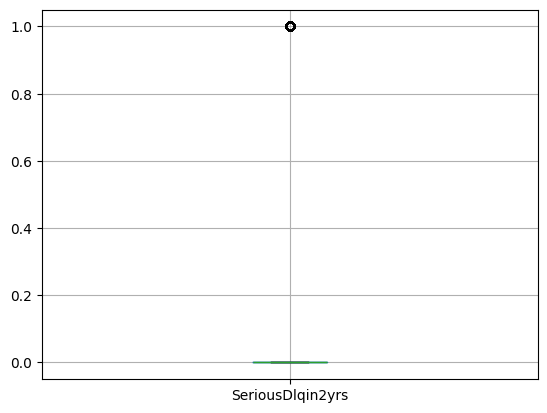

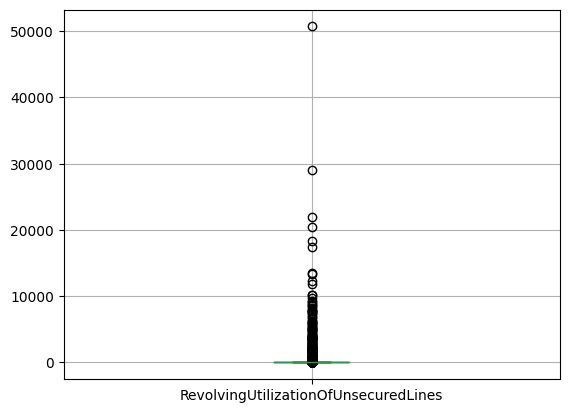

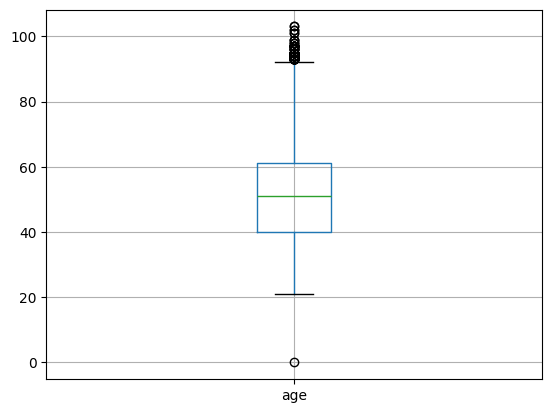

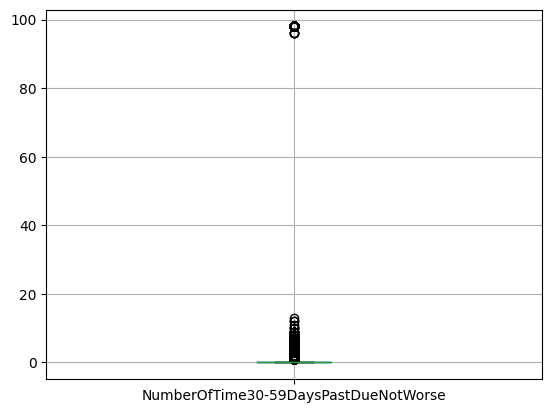

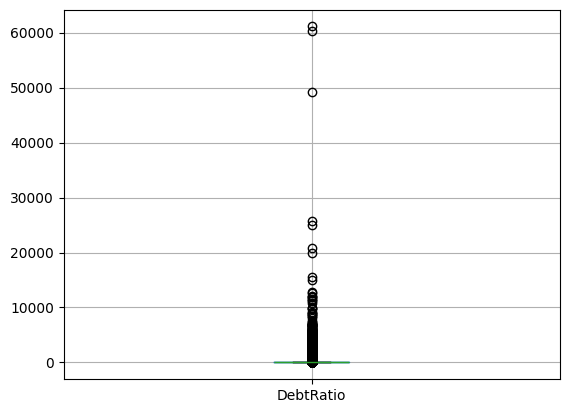

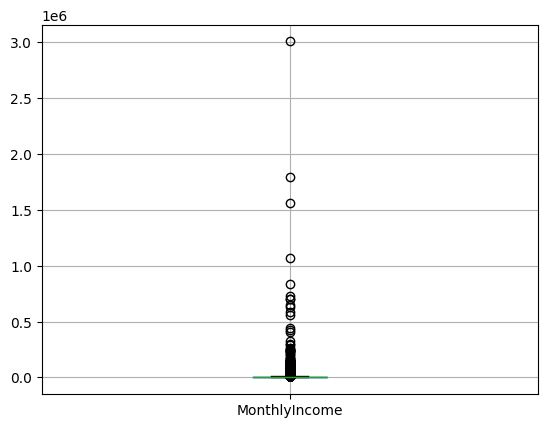

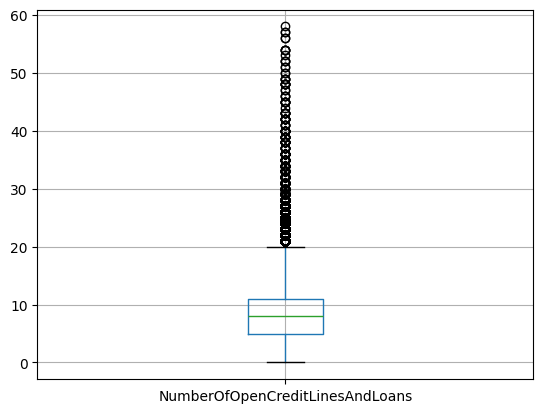

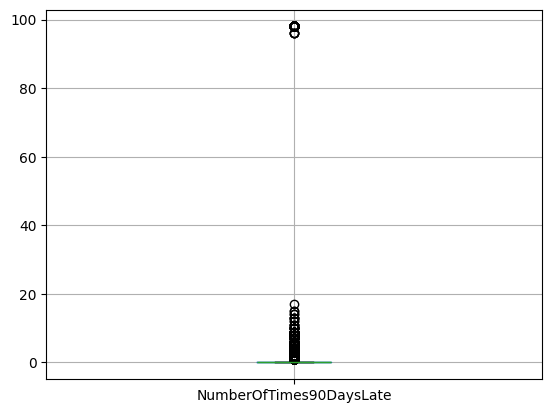

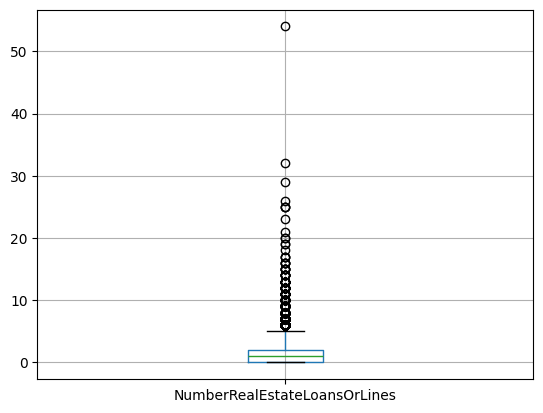

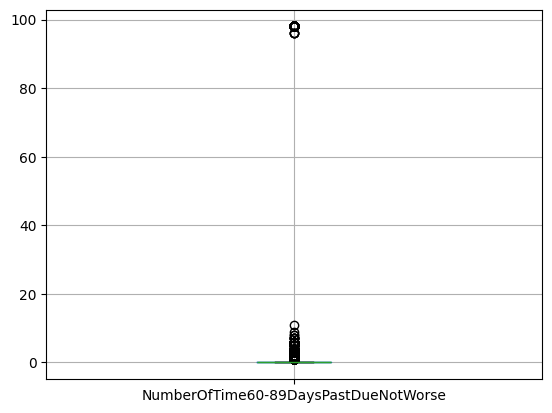

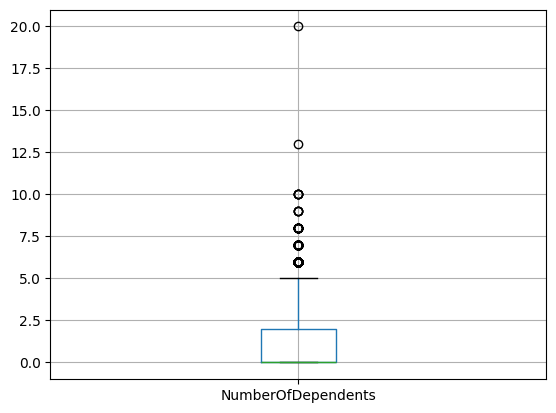

In [143]:
for col in data.columns:
    plt.subplots(1, 1)
    pd.DataFrame(data[col]).boxplot()
    plt.show()

## Удаляем выбросы

In [144]:
topline = data["age"].quantile(0.75) + (data["age"].quantile(0.75) - data["age"].quantile(0.25)) * 1.5 
downline = 20
data = data.drop(data["age"][data["age"] > topline].index)
data = data.drop(data["age"][data["age"] < downline].index)
data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


## Нормализация датасета

In [145]:
# def normalizier(data):
#     for col in data.columns[1:]:
#         data[col] = (data[col] - data[col].mean())/data[col].std()
#     return data

# data = normalizier(data)
# data

## Построим корреляционную матрицу

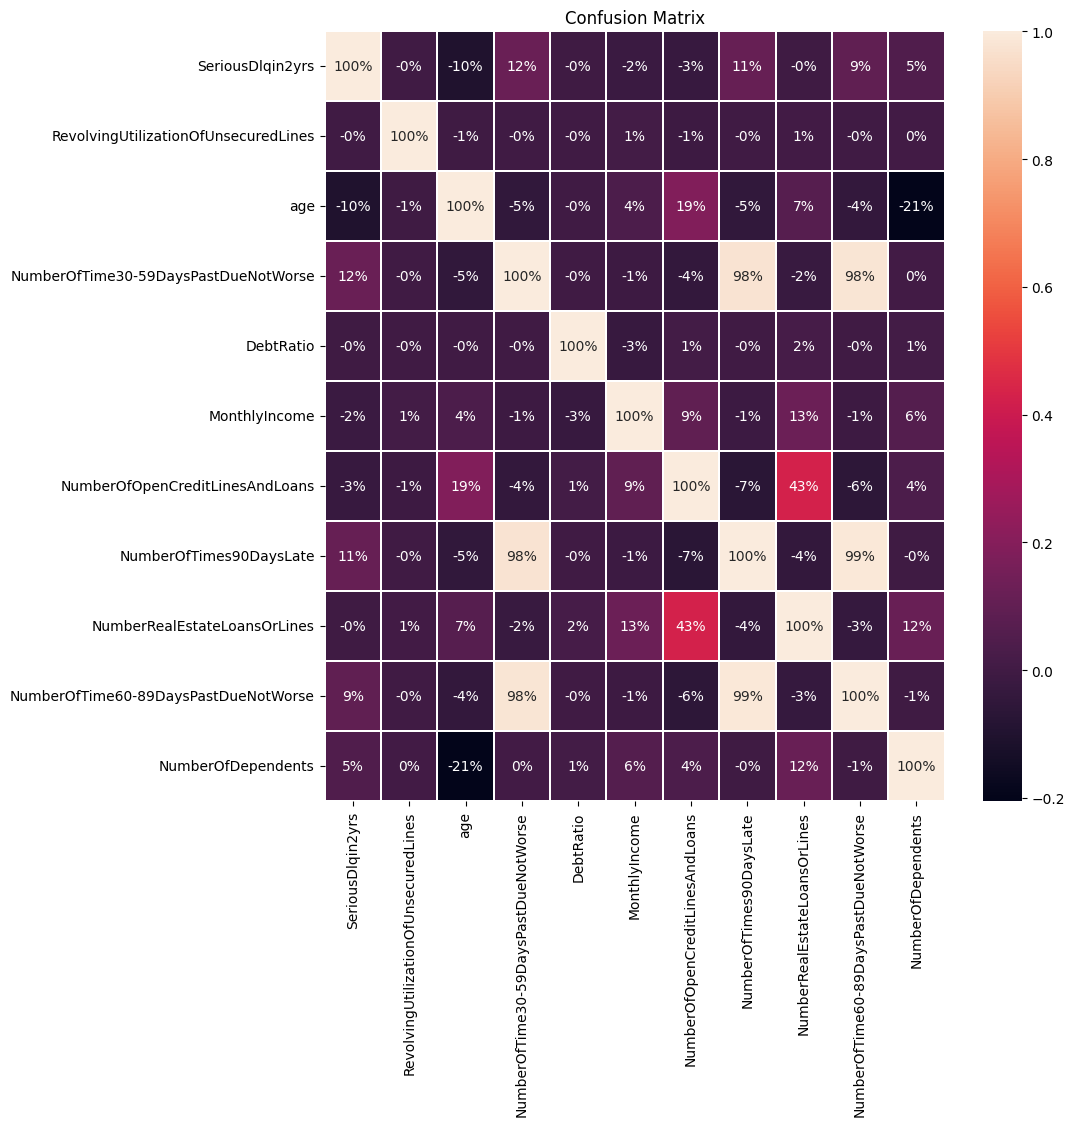

In [146]:
def draw_cov(data):
    figsize = (10,10)
    fig, ax = plt.subplots(figsize=figsize)
    plt.title('Confusion Matrix')
    se.heatmap(data.corr(), annot=True, fmt="0.0%", linewidth=0.1)

draw_cov(data)

## Убираем признаки сильнокоррелирующие друг с другом

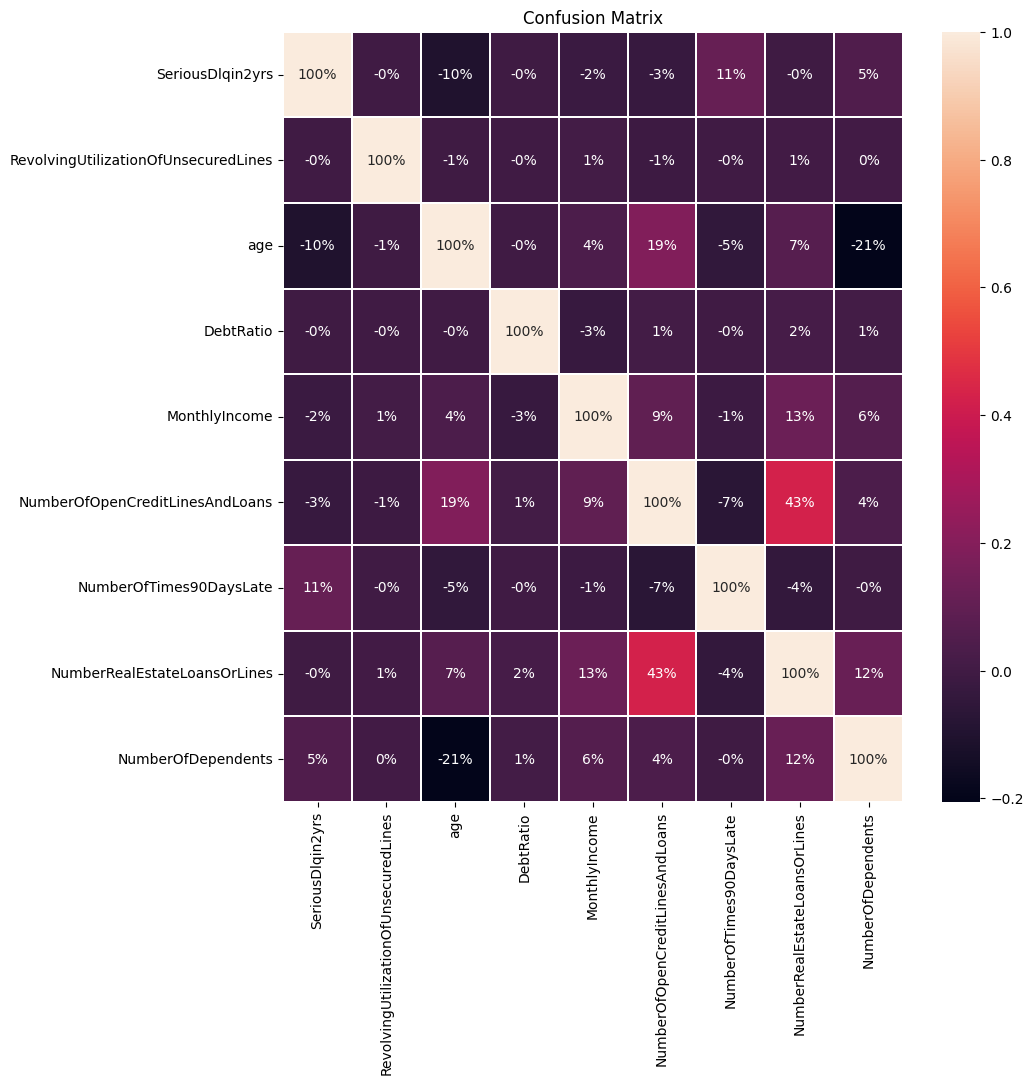

In [147]:
datacopy = copy.copy(data)
datacopy = datacopy.drop("NumberOfTime60-89DaysPastDueNotWorse", axis=1)
datacopy = datacopy.drop("NumberOfTime30-59DaysPastDueNotWorse", axis=1)
draw_cov(datacopy)

## Логистическая регрессия

In [ ]:
class LogisticRegressin:
    def sigmoid(self, X):
         return ( 1 / ( 1 + np.e**( X.T @ self.w ) ) )

    def fit(self, X, y, max_steps):
        self.w = np.ones(( X.shape[0], 1 ))
        steps = 0
        while steps < max_steps:
            L = np.sum(y * np.log( self.sigmoid(X) ).sum() + (1 - y) * np.log( 1 - self.sigmoid(X) ).sum() )
            self.w -= L.T
            steps += 1
        return self

In [ ]:
X, y = datacopy[datacopy.columns[1:].values].values, datacopy["SeriousDlqin2yrs"].values
model = LogisticRegressin().fit(X, y, 10)

[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[0 1 1 ... 1 1 1]
nan
nan
[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


/tmp/ipykernel_4372/19455901.py:3: RuntimeWarning: overflow encountered in power
  return ( 1 / ( 1 + np.e**( X.T @ self.w ) ) )
/tmp/ipykernel_4372/19455901.py:10: RuntimeWarning: divide by zero encountered in log
  print(np.log(np.log( self.sigmoid(X) ).sum()))
/tmp/ipykernel_4372/19455901.py:10: RuntimeWarning: invalid value encountered in log
  print(np.log(np.log( self.sigmoid(X) ).sum()))
/tmp/ipykernel_4372/19455901.py:11: RuntimeWarning: divide by zero encountered in log
  L = np.sum(y * np.log( self.sigmoid(X) ).sum() + (1 - y) * np.log( 1 - self.sigmoid(X) ).sum() )
/tmp/ipykernel_4372/19455901.py:11: RuntimeWarning: invalid value encountered in multiply
  L = np.sum(y * np.log( self.sigmoid(X) ).sum() + (1 - y) * np.log( 1 - self.sigmoid(X) ).sum() )
